In [1]:
# All libs be imported
import os
import pandas as pd
import numpy as np
import datetime as dt
import logging
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from torch import optim
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

# Setup Logging
logging.basicConfig(level=logging.DEBUG)
logging.getLogger('matplotlib').setLevel(logging.WARNING)

In [2]:
""" All files in src directory """
from market_processing import *
from entities import *

In [3]:
my_symbols = ['AAPL', 'TSLA', 'MSFT']
my_basket = AssetBasket(symbols=my_symbols)

DEBUG:entities.basket:Initialized Asset Basket: ['AAPL', 'TSLA', 'MSFT'] with 0 assets which loaded.


In [4]:
my_basket.load_all_assets(freq="1d")

INFO:entities.basket:Starting batch load for 3 symbols...
DEBUG:entities.basket:Attempting to load AAPL...
DEBUG:entities.asset:Initialized Asset: AAPL with 2724 rows.
INFO:entities.basket:Successfully loaded AAPL (2724 rows).
DEBUG:entities.basket:Attempting to load TSLA...
DEBUG:entities.asset:Initialized Asset: TSLA with 2760 rows.
INFO:entities.basket:Successfully loaded TSLA (2760 rows).
DEBUG:entities.basket:Attempting to load MSFT...
DEBUG:entities.asset:Initialized Asset: MSFT with 2724 rows.
INFO:entities.basket:Successfully loaded MSFT (2724 rows).
INFO:entities.basket:Batch load complete. Success: 3/3. Total assets in basket: 3


DEBUG:entities.asset:AAPL converted to Returns (Log=True)


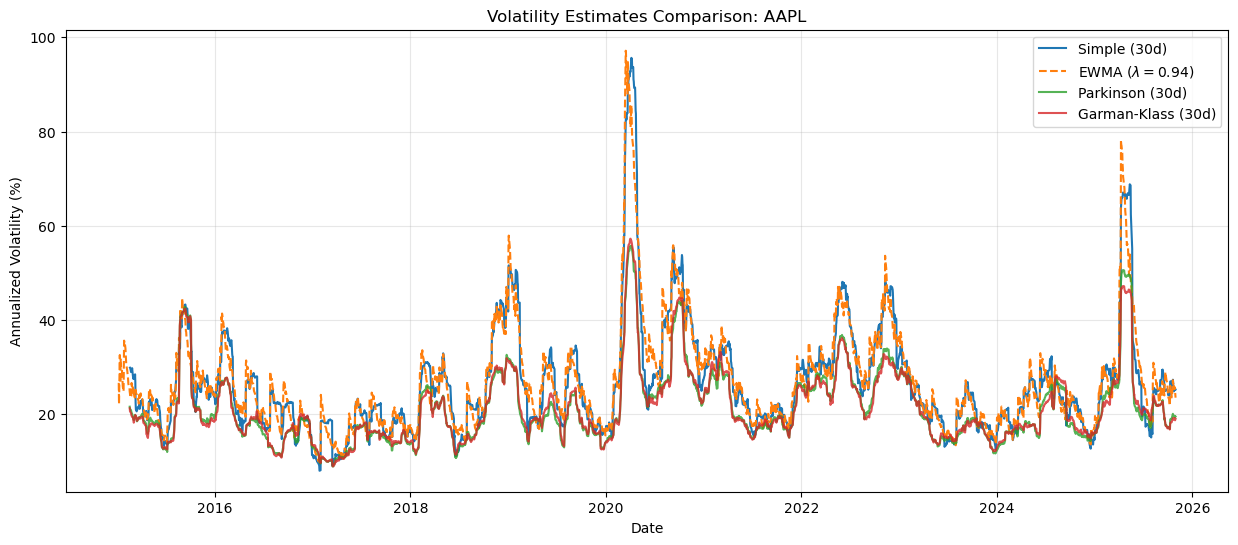

DEBUG:entities.asset:TSLA converted to Returns (Log=True)


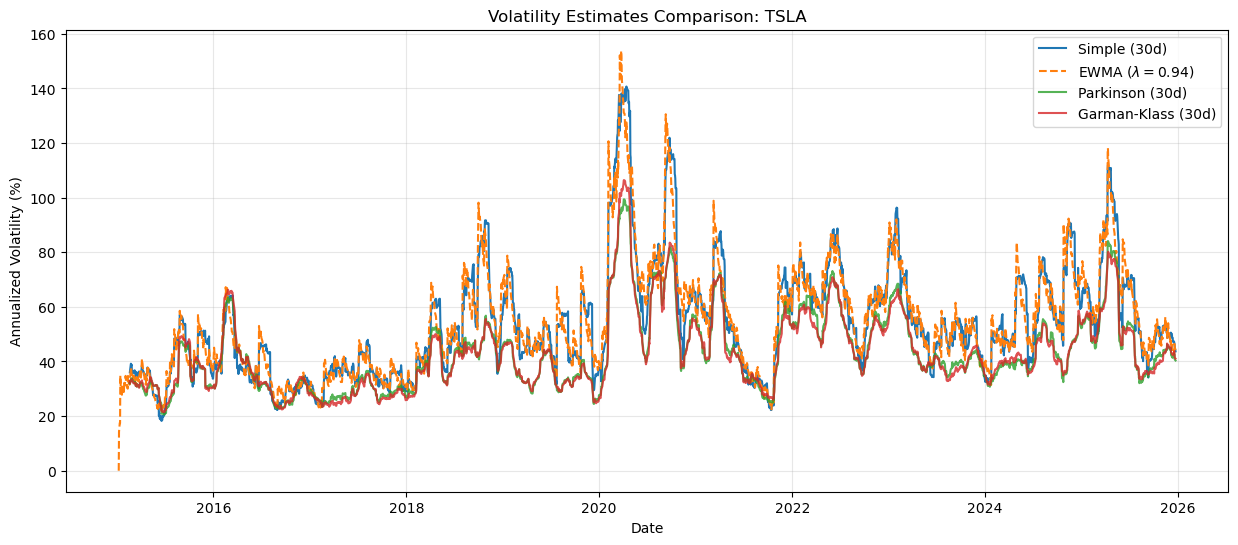

DEBUG:entities.asset:MSFT converted to Returns (Log=True)


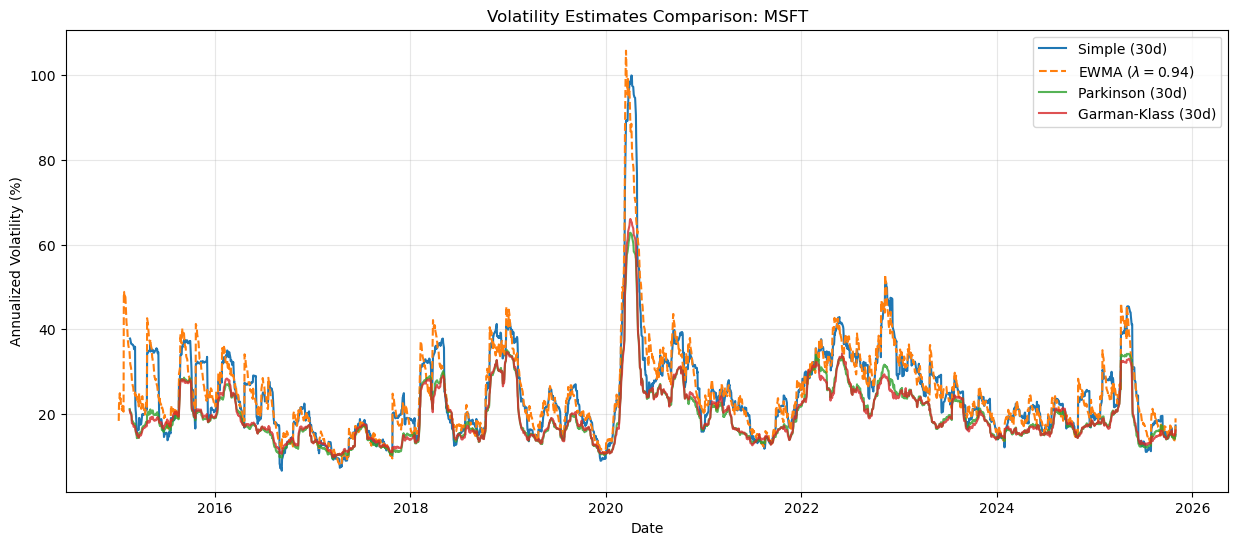

In [14]:
for symbol, asset in my_basket.assets.items():
    asset.to_returns(log=True, target_features=['Close'])
    asset.get_simple_vol(look_back=20)
    asset.plot_volatility_comparison(look_back=30, lamb=0.94)

In [6]:
my_basket.get_stats_summary()

,count,mean,std,min,25%,50%,75%,max,skew,kurt
symbol,,,,,,,,,,
AAPL,2723.0,0.000887,0.018264,-0.137708,-0.007422,0.001000,0.010039,0.142617,-0.091082,6.281809
TSLA,2759.0,0.001272,0.036304,-0.236518,-0.016660,0.001261,0.019425,0.204491,-0.056569,4.357829
MSFT,2723.0,0.000947,0.016983,-0.159454,-0.006668,0.000958,0.009423,0.132929,-0.098976,8.165358
TOTAL_AVG,8205.0,0.001035,0.023850,-0.177893,-0.010250,0.001073,0.012962,0.160012,-0.082209,6.268332


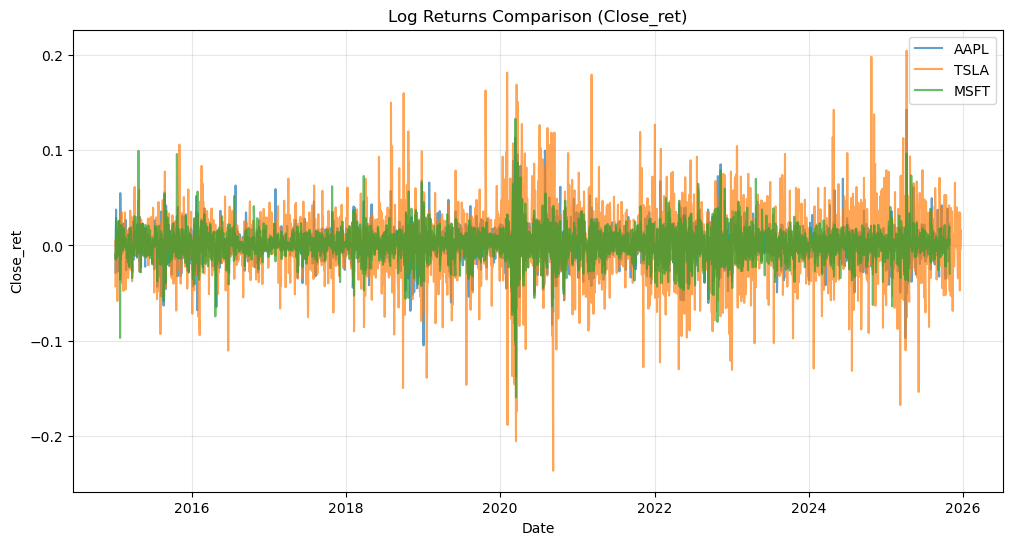

In [7]:
my_basket.plot_assets(title='Log Returns Comparison')

In [8]:
strategy = StrictAlignment()
joint_df = my_basket.get_joint_data(strategy)

DEBUG:market_processing.strategies.concrete:Aligning 3 assets. Total input rows: 8205
INFO:market_processing.strategies.concrete:Alignment Complete (Strict/Inner Join).
INFO:market_processing.strategies.concrete:  - Start Date: 2015-01-05 00:00:00
INFO:market_processing.strategies.concrete:  - End Date:   2025-10-30 00:00:00
INFO:market_processing.strategies.concrete:  - Common Rows: 2723 (Dropped 0 rows of partial NaNs)
DEBUG:entities.basket:Aligned data shape: (2723, 18)


In [9]:
print("\n--- Joint Data Head ---")
print(joint_df.head())


--- Joint Data Head ---
            AAPL_Close  AAPL_High   AAPL_Low  AAPL_Open  AAPL_Volume  \
Date                                                                   
2015-01-05   23.577574  24.110150  23.391173  24.030263    257142000   
2015-01-06   23.579794  23.839424  23.218085  23.641928    263188400   
2015-01-07   23.910433  24.010290  23.677430  23.788384    160423600   
2015-01-08   24.829119  24.886815  24.121236  24.238848    237458000   
2015-01-09   24.855753  25.130917  24.456320  25.002210    214798000   

            AAPL_Close_ret  TSLA_Close  TSLA_High   TSLA_Low  TSLA_Open  \
Date                                                                      
2015-01-05       -0.028576   14.006000  14.433333  13.810667  14.303333   
2015-01-06        0.000094   14.085333  14.280000  13.614000  14.004000   
2015-01-07        0.013925   14.063333  14.318667  13.985333  14.223333   
2015-01-08        0.037702   14.041333  14.253333  14.000667  14.187333   
2015-01-09        0.

In [10]:
# # 2. Align Data (รวมร่าง)
#     # ใช้ StrictAlignment เพื่อเอาเฉพาะวันที่ตลาดเปิดตรงกัน

    
#     print(f"Joint Data Shape: {joint_df.shape}")
#     # columns จะเป็น [AAPL_Close_ret, MSFT_Close_ret]
    
#     # 3. Preprocess for Model (Scale & Window)
#     processor = MarketPreprocessor(window_size=60, train_split=0.8)
#     X_train, X_test = processor.fit_transform(joint_df)

In [11]:
dm = MarketDataModule(
        joint_df=joint_df,
        window_size=10,
        batch_size=4,
        split_ratio=(0.7, 0.2, 0.1)
    )

In [12]:
dm.setup()

INFO:market_processing.data_module:Setting up MarketDataModule...
DEBUG:market_processing.data_module:Split sizes - Train: 1906, Val: 544, Test: 273
INFO:market_processing.data_module:MarketDataModule setup complete.


In [13]:
dm.visualize_sample(index=0, feature_idx=0, dataset_type='test')

AttributeError: 'MarketDataModule' object has no attribute 'visualize_sample'